# PID Controller

This example demonstrates a PID (Proportional-Integral-Derivative) controller in PathSim, including automatic differentiation for sensitivity analysis. The system tracks a step-changing setpoint and computes how the error signal responds to changes in PID parameters.

You can also find this example as a single file in the [GitHub repository](https://github.com/milanofthe/pathsim/blob/master/examples/example_pid.py).

## Import and Setup

First let's import the required classes and blocks:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Apply PathSim docs matplotlib style
plt.style.use('../pathsim_docs.mplstyle')

from pathsim import Simulation, Connection
from pathsim.blocks import Source, Integrator, Amplifier, Adder, Scope, PID
from pathsim.solvers import RKCK54

## System Parameters

In [4]:
# Plant gain
K = 0.4

# PID parameters 
Kp, Ki, Kd = 1.5, 0.5, 0.1

# Setpoint function - step changes at t=20s and t=60s
def f_s(t):
    if t > 60:
        return 0.5
    elif t > 20:
        return 1
    else:
        return 0

## System Definition

Now we can construct the system by instantiating the blocks we need and collecting them in a list:

In [7]:
# Blocks
spt = Source(f_s)  
err = Adder("+-")  # Computes setpoint - output
pid = PID(Kp, Ki, Kd, f_max=10)  # PID with saturation
pnt = Integrator()
pgn = Amplifier(K)
sco = Scope(labels=["s(t)", "x(t)", r"$\epsilon(t)$"])

blocks = [spt, err, pid, pnt, pgn, sco]

In [9]:
connections = [
    Connection(spt, err, sco[0]),      # Setpoint to error and scope
    Connection(pgn, err[1], sco[1]),   # Output to error (negative) and scope
    Connection(err, pid, sco[2]),      # Error to PID and scope
    Connection(pid, pnt),              # PID output to plant
    Connection(pnt, pgn)               # Plant to gain
]

## Simulation Setup and Execution

In [12]:
# Simulation initialization
Sim = Simulation(blocks, connections, Solver=RKCK54)

# Run the simulation for 100 seconds
Sim.run(100)

2025-11-01 12:45:06,295 - INFO - LOGGING (log: True)
2025-11-01 12:45:06,297 - INFO - BLOCK (type: Source, dynamic: False, events: 0)
2025-11-01 12:45:06,297 - INFO - BLOCK (type: Adder, dynamic: False, events: 0)
2025-11-01 12:45:06,298 - INFO - BLOCK (type: PID, dynamic: True, events: 0)
2025-11-01 12:45:06,298 - INFO - BLOCK (type: Integrator, dynamic: True, events: 0)
2025-11-01 12:45:06,299 - INFO - BLOCK (type: Amplifier, dynamic: False, events: 0)
2025-11-01 12:45:06,299 - INFO - BLOCK (type: Scope, dynamic: False, events: 0)
2025-11-01 12:45:06,300 - INFO - GRAPH (size: 6, alg. depth: 4, loop depth: 0, runtime: 0.081ms)
2025-11-01 12:45:06,301 - INFO - STARTING -> TRANSIENT (Duration: 100.00s)
2025-11-01 12:45:06,301 - INFO - TRANSIENT:   0% | elapsed: 00:00:00 (eta: --:--:--) | 0 steps (N/A steps/s)
2025-11-01 12:45:06,325 - INFO - TRANSIENT:  20% | elapsed: 00:00:00 (eta: --:--:--) | 113 steps (4807.2 steps/s)
2025-11-01 12:45:06,342 - INFO - TRANSIENT:  40% | elapsed: 00:00:

{'total_steps': 485, 'successful_steps': 316, 'runtime_ms': 101.60380002344027}

## Results

Let's plot the setpoint, output, and error signals to see how well the PID controller tracks the setpoint:

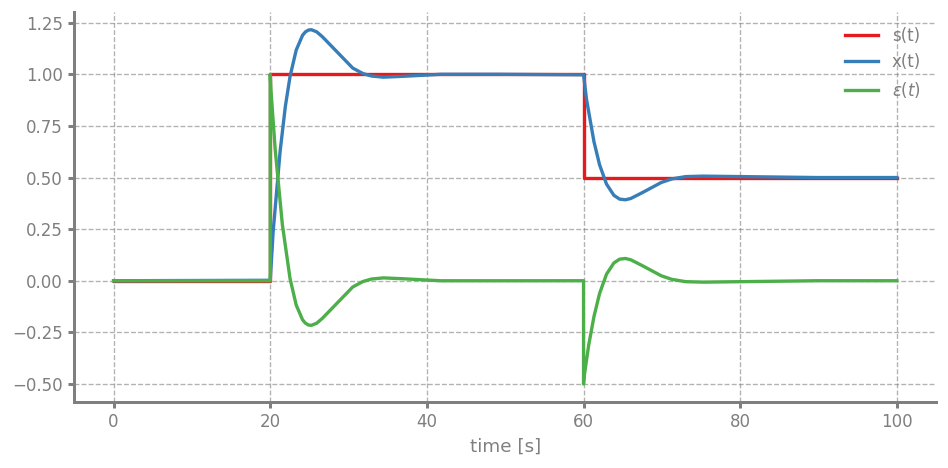

In [17]:
sco.plot()
plt.show()